### 1) After going through the some of the reviews about the resort randomly I came across different aspects in the reviews. In general majority reviews contain positive and negative aspects. Positive aspects like clean rooms, great location, professional staff etc.Negative aspects like room is tiny, old building, ugly shower etc To get the proper insights of the reviews it’s important to understand what particular aspects do the guests love or hate about a particular hotel?


### 2) To understand whether a review is positive or negative we have to do the sentimental Analysis after cleaning the reviews 

In [2]:
import pandas as pd

In [32]:
#Read CSV file
df=pd.read_csv(r'C:\Users\Admin\Desktop\Data Analyst - Test Data - US.csv')

In [33]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [34]:
data=df.drop(['date','Location'],axis=True)

In [35]:
data

,Review
0,I was very impressed with the resort.\n Great ...
1,The rooms were nice the outside needs work als...
2,Great location! I have stayed at this hotel on...
3,The hotel was adequate for my stay. The strips...
4,"Great location, room was large and spacious. P..."
...,...
6443,"·the staff were all so friendly. frank, the ch..."
6444,·the internet barely worked or didn't work
6445,·the location was great.\n \n \n \n \n ·the be...
6446,·we were early for check in and the staff was ...


In [36]:
#Cleaning the data or reviews

import string
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
stop=stopwords.words("english")
def cleanText(message):
    message = re.sub('[^a-zA-Z]', ' ', str(message))
    message = message.lower()
    message = message.split()
    words = [ss.stem(word) for word in message if word not in stop]
    return " ".join(words)

data["Review"] = data["Review"].apply(cleanText)




In [37]:
data['Review']

0       impress resort great staff main resort pool ba...
1       room nice outsid need work also free breakfast...
2       great locat stay hotel last three trip new yor...
3       hotel adequ stay strip bathtub useless fell ta...
4       great locat room larg spacious park easi appre...
                              ...                        
6443    staff friend frank chef buffet bar top meet ne...
6444                              internet bare work work
6445                   locat great bed uncomfort bed ever
6446    earli check staff accommod abl check sever hou...
6447    staff free coffe locat activ bed smaller thoug...
Name: Review, Length: 6448, dtype: object

In [9]:
# Subjectivity and Polarity Checking
mport textblob
from textblob import TextBlob

# Create a function to get the subjectivity

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'

data['Subjectivity'] = data['Review'].apply(getSubjectivity)
data['Polarity'] = data['Review'].apply(getPolarity)



In [25]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
data.head()

,Review,Subjectivity,Polarity
0,impress resort great staff main resort pool ba...,0.520000,0.393333
1,room nice outsid need work also free breakfast...,0.673333,0.386667
2,great locat stay hotel last three trip new yor...,0.334470,0.192424
3,hotel adequ stay strip bathtub useless fell ta...,0.493333,0.046667
4,great locat room larg spacious park easi appre...,0.408333,0.316667


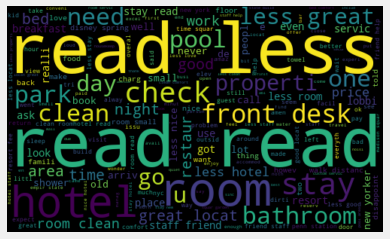

In [38]:
# word cloud visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

allWords = ' '.join([review for review in data['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data

,Review,Subjectivity,Polarity,Analysis
0,impress resort great staff main resort pool ba...,0.520000,0.393333,Positive
1,room nice outsid need work also free breakfast...,0.673333,0.386667,Positive
2,great locat stay hotel last three trip new yor...,0.334470,0.192424,Positive
3,hotel adequ stay strip bathtub useless fell ta...,0.493333,0.046667,Positive
4,great locat room larg spacious park easi appre...,0.408333,0.316667,Positive
...,...,...,...,...
6443,staff friend frank chef buffet bar top meet ne...,0.552381,0.314935,Positive
6444,internet bare work work,0.100000,0.050000,Positive
6445,locat great bed uncomfort bed ever,0.750000,0.800000,Positive
6446,earli check staff accommod abl check sever hou...,0.000000,0.000000,Neutral


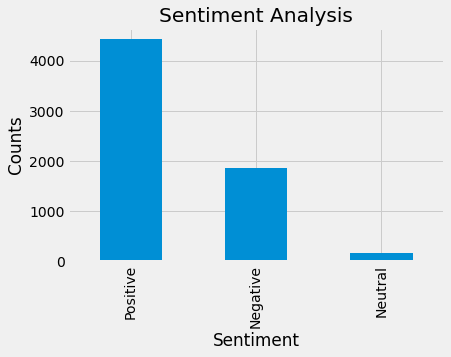

In [31]:
# Plotting and visualizing the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()